MS substitution: Azure Machine Learning Notebooks instead of GC - Tried , waiting for dependencies.

In [ ]:
# pip install pandas scikit-learn joblib tensorflow transformers
#!pip install ace_tools

In [ ]:
# from google.colab import drive
# import os
# import shutil
# import pandas as pd

# # Mount Google Drive
# drive.mount('/content/drive')

# # Copy the file from Google Drive to the Colab content directory
# shutil.copy('/content/drive/My Drive/krasan_dataset/SSMA_Candidate.xlsx', '/content/file1.xlsx')

# # Read and display the first few rows of the DataFrame
# df1 = pd.read_excel('/content/file1.xlsx')
# print(df1.head())

# skills_df = df1[['id', 'applicant_id', 'experience', 'skills']]

# # Print the first 10 rows of the new DataFrame
# print("Skills DataFrame: ")
# print(skills_df.head(10))

Microsoft Tool: Azure Data Factory (for data integration and transformation), Microsoft Power Automate (for automating file handling tasks), and Power BI (for data visualization and processing).

Microsoft Tool: Power BI (for data manipulation and extraction).


In [ ]:
# CHECKPOINT: Code to upload skills & salaries DF
from google.colab import files
import pandas as pd

# Upload the final input for the ML model
input = files.upload()

# Read the Excel file
skills_and_salaries_df = pd.read_excel(next(iter(input)))
print(skills_and_salaries_df.head())

Saving Skills_and_salaries.xlsx to Skills_and_salaries.xlsx
    ID                         Name  Pay_Rate Pay_Type  Net_Salary  \
0   42         Meena Kanagasabapaty      67.0   hourly    139360.0   
1   51  Pranitha Chowdari Pallinane      60.0   hourly    124800.0   
2   54                       Priya       65.0   hourly    135200.0   
3   75               Sumanth Batchu      65.0   hourly    135200.0   
4  118              HITESH KESHWALA      78.0   hourly    162240.0   

                                              Skills  
0  JOINT APPLICATION DESIGN , TESTING , OPC , SYS...  
1  RELEASE , APPLICATION MODULES , REPORTING , PR...  
2  SPRINT , R , CAN , FAS , SERVICENOW , TECHNICA...  
3  QUALITY , .NET SECURITY , QA , HTML5 , DATA IN...  
4  BI STUDIO , STORED PROCEDURES , CASCADING , SY...  


In [ ]:
import pandas as pd

# Extract the skills column and split the comma-separated values into a list
skills_list = []
seen_skills = set()

for skills in skills_and_salaries_df['Skills']:
    if pd.notna(skills):  # Check if the value is not NaN
        for skill in map(str.strip, skills.split(',')):  # Split and strip whitespace from each skill
            if skill and skill not in seen_skills:  # Check if the skill is not an empty string and not seen before
                skills_list.append(skill)  # Add each unique skill to the list
                seen_skills.add(skill)

# Print the list of unique skills
print("Unique Skills List: ")
print(skills_list)

# Print the number of unique skills
print("\nNumber of unique skills: ", len(skills_list))

# Additional code to count the total number of skills (considering duplicates)
total_skills_count = sum(len(skills.split(',')) for skills in skills_and_salaries_df['Skills'] if pd.notna(skills))

# Print the total number of skills (considering duplicates)
print("\nTotal number of skills (considering duplicates): ", total_skills_count)

Unique Skills List: 
['JOINT APPLICATION DESIGN', 'TESTING', 'OPC', 'SYSTEM AUTOMATION', 'EDUCATION', 'DATA QUALITY', 'FILE MANAGER', 'PRODUCTION SUPPORT', 'CONFLUENCE', 'BMC', 'BMC MAINVIEW', 'IT PROFESSIONAL', 'POST PRODUCTION', 'TASK MANAGEMENT', 'SYNCSORT', 'COBOL', 'SUBJECT MATTER EXPERTS', 'MVS', 'SMES', 'SYSPLEX', 'PROJECT', 'HEALTH CHECK', 'CICSPLEX', 'WINDOWS 9X', 'DATABASES', 'SERVICENOW', 'DB2 ENVIRONMENT', 'MS ACCESS', 'CUSTOMIZATION', 'IBM MAINFRAME', 'CAFC', 'NET EXPRESS', 'SDSF', 'SCM', 'NETVIEW', 'MS-EXCEL', 'WLM', 'SMP/E', 'JIRA', 'MIDDLEWARE', 'JAD', 'Z/OS', 'ABEND-AID', 'APPLICATION', 'SQL DATABASE', 'ISPF', 'INSTALLATION', 'DATA INTEGRATION', 'IBM SPUFI', 'UPGRADES', 'WARRANTY', 'IBM MQ', 'AGILE PROJECT MANAGEMENT', 'SORTING', 'MESSAGING', 'MONITORING', 'HSM', 'BUSINESS SYSTEM ANALYST', 'IMS', 'HARDWARE AND OS', 'OPERATING SYSTEMS', 'WEB', 'PRODUCTION', 'USER INTERFACE', 'WAS', 'EMAIL', 'INTEGRATION', 'UTILITIES', 'FIX', 'SYSTEM', 'WEALTH MANAGEMENT', 'DEBUG', 'BUSI

In [ ]:
import re

# Function to normalize skills
import re

def normalize_skill(skill):
    skill = re.sub(r'\s+', ' ', re.sub(r'[^a-zA-Z0-9+#/.]', ' ', skill.lower())).strip()
    # Split the skill into words and filter out items that are only numbers
    skill = ' '.join([word for word in skill.split() if not word.isdigit()])
    return skill

# Normalize the skills in the existing skills_list and ensure uniqueness
normalized_skills_list = []
seen_skills = set()

for skill in skills_list:
    normalized_skill = normalize_skill(skill)
    if normalized_skill not in seen_skills:
        normalized_skills_list.append(normalized_skill)
        seen_skills.add(normalized_skill)

# Print the list of unique normalized skills
print("Normalized Unique Skills List: ")
print(normalized_skills_list)

# Print the number of unique normalized skills
print("\nNumber of unique normalized skills: ", len(normalized_skills_list))


Normalized Unique Skills List: 
['joint application design', 'testing', 'opc', 'system automation', 'education', 'data quality', 'file manager', 'production support', 'confluence', 'bmc', 'bmc mainview', 'it professional', 'post production', 'task management', 'syncsort', 'cobol', 'subject matter experts', 'mvs', 'smes', 'sysplex', 'project', 'health check', 'cicsplex', 'windows 9x', 'databases', 'servicenow', 'db2 environment', 'ms access', 'customization', 'ibm mainframe', 'cafc', 'net express', 'sdsf', 'scm', 'netview', 'ms excel', 'wlm', 'smp/e', 'jira', 'middleware', 'jad', 'z/os', 'abend aid', 'application', 'sql database', 'ispf', 'installation', 'data integration', 'ibm spufi', 'upgrades', 'warranty', 'ibm mq', 'agile project management', 'sorting', 'messaging', 'monitoring', 'hsm', 'business system analyst', 'ims', 'hardware and os', 'operating systems', 'web', 'production', 'user interface', 'was', 'email', 'integration', 'utilities', 'fix', 'system', 'wealth management', 'de

In [ ]:
# #  CHECKPOINT :  to download  Skills_new_df in xlsx format
# import pandas as pd
# from google.colab import files

# # Convert the list to a DataFrame with one column named 'skills'
# normalized_skills_df = pd.DataFrame(normalized_skills_list, columns=['skills'])

# # Save the DataFrame to an Excel file
# normalized_skills_df.to_excel('Skills_new_df.xlsx', index=False)

# # Download the Excel file
# files.download('Skills_new_df.xlsx')

START HERE!! UPLOAD SKILLS_NEW


In [ ]:
# import pandas as pd
# from google.colab import files

# # Upload the file
# uploaded = files.upload()

# # Read the Excel file
# df = pd.read_excel(next(iter(uploaded)))

# # Convert the only column present in the Excel file to a Python list
# normalized_skills_list = df.iloc[:, 0].tolist()
# print(len(normalized_skills_list))


In [ ]:

# skill_categories = [
#     ["Data Analysts and Specialists", "Sr Data Conversion Specialist", "Data Conversion Specialist", "DataWarehouse Engineer", "Data Analyst", "Power BI Data Visualization expert"],
#     ["Database Administrators and Developers", "Database Administrator", "SQL Developer", "Sr Oracle DBA", "MySQL Developer"],
#     ["Developers (General)", ".Net Developer", "Software Developer", "Oracle eBusiness HCM/BI Developer", "Jitterbit Developer", "Oracle Fusion SOA Developer", "ADF Developer", "Oracle EBS Support"],
#     ["Integration Developers", "MuleSoft Integration Developer", "Integration Developer – Technical", "Workday Integration Developer"],
#     ["Business Analysts", "Business Analyst (Functional)", "Functional Business Analyst", "Sr. Business Analyst", "Business Analyst", "Proposal Analyst"],
#     ["Project Management and Coordination", "Program Manager", "Project Manager", "Project Coordinator", "Client Project Coordinator", "Release Train Engineer"],
#     ["Quality Assurance and Testing", "Manual Tester", "QA Tester", "Performance Tester", "Automation Tester", "Quality Analyst", "Functional Tester", "DCFS- Tester - Manual/Functional/Automation"],
#     ["Security Specialists", "Senior Security Specialist"],
#     ["Architects and Leads", "AWS Specialized Architect", "Sr. Technical Lead and APEX Architect Consultant", "Architect, Developer"],
#     ["Consultants", "Business Object Consultant", "Oracle PPM Consultant", "SAP HANA/BI Consultant", "Senior Consultant", "Oracle HCM Benefits Consultant"],
#     ["HR and Talent Acquisition", "HR Classification Analyst", "Director, Talent Acquisition", "US IT Recruiter - Internal", "HR and Immigration Analyst", "Fractional Staffing Consultant"],
#     ["Proposal Support", "Proposal Support - Non Billable", "Proposal Support - Billable"],
#     ["Training and Development", "SAP ERP Trainer", "Training Developer"],
#     ["Administration and Coordination (Internal)", "Internal – Non-Client Billable – Administrative"],
#     ["Marketing and Product Management", "Marketing Services Coordinator - 01 Open Position", "Product Owner"],
#     ["Financial Support and Analysis", "Oracle AP & Expenses Support Analyst", "Core Financial Support Analyst", "Manager - Finance", "AP And Expenses Lead"],
#     ["Helpdesk and IT Support", "Helpdesk Analyst"],
#     ["UI/UX and Front-end Development", "UI/Front-end Developer", "CCC_UX Strategist"],
#     ["ERP and Dynamics Specialists", "MS Dynamics 365 Developer", "Dynamics 365 Developer"],
#     ["Java Developers", "Lead Java Developer", "Java Developer"],
#     ["PowerBI Specialists", "PowerBI Developer"],
#     ["Client and Account Management", "Account Manager"],
#     ["Strategic and Executive Roles", "VP - Consulting Services", "Senior Director, Consulting Services – Data Services"],
#     ["Release Management", "Solution Designer"],
#     ["Human Resources IT Management", "HRIT/Manager"]
# ]
# # No. of skill categories = 25
# print("No. of skill categories = ", len(skill_categories))

In [ ]:
categories = [
    "Data Analysts and Specialists",
    "Database Administrators and Developers",
    "Developers (General)",
    "Integration Developers",
    "Business Analysts",
    "Project Management and Coordination",
    "Quality Assurance and Testing",
    "Security Specialists",
    "Architects and Leads",
    "Consultants",
    "HR and Talent Acquisition",
    "Proposal Support",
    "Training and Development",
    "Administration and Coordination (Internal)",
    "Marketing and Product Management",
    "Financial Support and Analysis",
    "Helpdesk and IT Support",
    "UI/UX and Front-end Development",
    "ERP and Dynamics Specialists",
    "Java Developers",
    "PowerBI Specialists",
    "Client and Account Management",
    "Strategic and Executive Roles",
    "Release Management",
    "Human Resources IT Management"
]
print("No. of skill categories = ", len(categories))
skills = normalized_skills_list

No. of skill categories =  25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Generate example category assignments for demonstration
np.random.seed(42)
assigned_categories = np.random.choice(categories, size=len(skills))

# Create a DataFrame
df = pd.DataFrame({
    'skill': skills,
    'category': assigned_categories
})

# Remove or fill NaN values in the 'skill' column
df['skill'] = df['skill'].fillna('')

# Vectorize the text data (skills)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['skill'])

# Encode the categories as integers
y = df['category'].astype('category').cat.codes

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# from sklearn.svm import SVC
# svm_classifier = SVC().fit(X_train, y_train)

# Initialize the Random Forest Classifier with parallel processing and a reasonable number of estimators
rf_classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=categories))

# Predict categories for all skills
all_predictions = rf_classifier.predict(X)

# Map integer codes back to category names
predicted_categories = [categories[i] for i in all_predictions]

# Create the output dictionary
output_dict = {category: [] for category in categories}
for skill, category in zip(skills, predicted_categories):
    output_dict[category].append(skill)

# Display the output dictionary
#print(output_dict)


Accuracy: 0.03
Classification Report:
                                            precision    recall  f1-score   support

             Data Analysts and Specialists       0.03      0.03      0.03       118
    Database Administrators and Developers       0.04      0.04      0.04       120
                      Developers (General)       0.04      0.03      0.03       154
                    Integration Developers       0.03      0.02      0.02       152
                         Business Analysts       0.05      0.04      0.05       160
       Project Management and Coordination       0.02      0.02      0.02       128
             Quality Assurance and Testing       0.04      0.03      0.04       160
                      Security Specialists       0.04      0.03      0.03       142
                      Architects and Leads       0.04      0.04      0.04       132
                               Consultants       0.04      0.03      0.03       163
                 HR and Talent Acquis

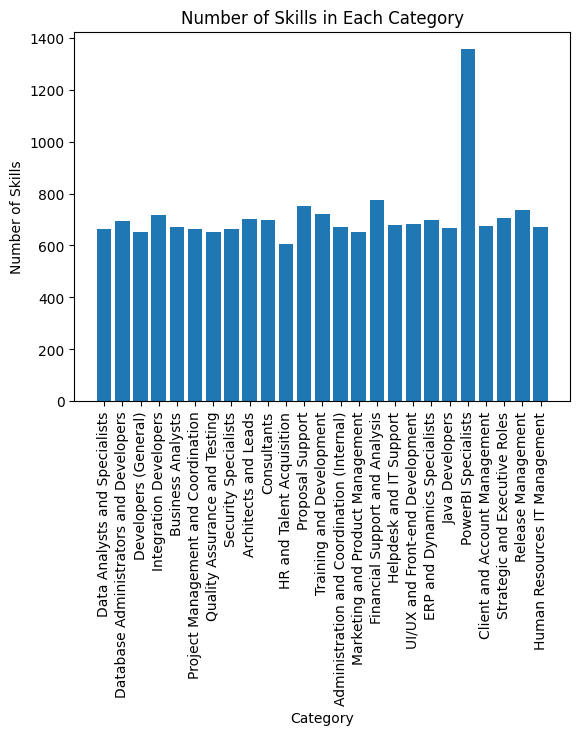

In [ ]:
# Count the number of skills in each category
category_counts = {category: len(skills) for category, skills in output_dict.items()}

# Display the counts
#print(category_counts)

import matplotlib.pyplot as plt

plt.bar(category_counts.keys(), category_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Skills')
plt.title('Number of Skills in Each Category')
#plt.show()


In [ ]:
import joblib

joblib.dump(rf_classifier, 'rf_classifier_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

from google.colab import files

# Download the files to the local machine
files.download('rf_classifier_model.joblib')
files.download('tfidf_vectorizer.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# import pandas as pd
# from io import BytesIO

# # Upload 2 files
# excel_inputs = files.upload()

# # Read the Excel files
# df1, df2 = (pd.read_excel(BytesIO(file)) for file in excel_inputs.values())

# # Merge the DataFrames and remove duplicated columns
# df_merged = pd.concat([df1, df2], axis=1)  # Concatenate horizontally
# df3 = df_merged.loc[:, ~df_merged.columns.duplicated()] # Remove duplicated columns

# # Display the first few rows of the merged DataFrame
# #print(df3.head())

# #column index of 'Skills' = 5

# # Convert df3 to an Excel file and save it locally
# df3.to_excel('Skills_and_salaries.xlsx', index=False)

# # Download the Excel file
# files.download('Skills_and_salaries.xlsx')

In [ ]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Load the trained model and vectorizer
rf_classifier = joblib.load('rf_classifier_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Ensure the 'Skills' column is present in the DataFrame
if 'Skills' not in skills_and_salaries_df.columns:
    raise KeyError("Column 'Skills' not found in DataFrame")

# Fill NaN values in the 'Skills' column with an empty string
skills_and_salaries_df['Skills'] = skills_and_salaries_df['Skills'].fillna('')

# Vectorize the skills column
X = vectorizer.transform(skills_and_salaries_df['Skills'])

# Predict the categories for each skill
predicted_categories = rf_classifier.predict(X)

# Map integer codes back to category names
skills_and_salaries_df['Job Role/ Skill Category'] = [categories[i] for i in predicted_categories]

# Print the head of the new DataFrame
#print(skills_and_salaries_df.head())


    ID                         Name  Pay_Rate Pay_Type  Net_Salary  \
0   42         Meena Kanagasabapaty      67.0   hourly    139360.0   
1   51  Pranitha Chowdari Pallinane      60.0   hourly    124800.0   
2   54                       Priya       65.0   hourly    135200.0   
3   75               Sumanth Batchu      65.0   hourly    135200.0   
4  118              HITESH KESHWALA      78.0   hourly    162240.0   

                                              Skills  \
0  JOINT APPLICATION DESIGN , TESTING , OPC , SYS...   
1  RELEASE , APPLICATION MODULES , REPORTING , PR...   
2  SPRINT , R , CAN , FAS , SERVICENOW , TECHNICA...   
3  QUALITY , .NET SECURITY , QA , HTML5 , DATA IN...   
4  BI STUDIO , STORED PROCEDURES , CASCADING , SY...   

              Job Role/ Skill Category  
0        Human Resources IT Management  
1  Project Management and Coordination  
2               Integration Developers  
3       Financial Support and Analysis  
4      UI/UX and Front-end Developmen

In [ ]:
# # CHECKPOINT: TO save the skills_and_salaries_with_categories dataframe ( excel)
# from google.colab import files

# # Save the DataFrame to an Excel file
# output_file = 'skills_and_salaries_with_categories.xlsx'
# skills_and_salaries_df.to_excel(output_file, index=False)
# files.download('skills_and_salaries_with_categories.xlsx')

In [ ]:
# # CHECKPOINT  :  to read  Balanced_Categorized_Skills_and_Salaries (METHOD 2)
# import pandas as pd
# from google.colab import files

# # Upload the file
# uploaded = files.upload()

# # Convert uploaded Excel file to DataFrame
# skills_and_salaries_df = pd.read_excel(list(uploaded.keys())[0])
# print(skills_and_salaries_df.head())


Vectorize Skills: Converts the 'Skills' column into numerical features using TF-IDF vectorization.

Prepare Target Variables: Defines target variables for job role, pay rate, and net salary.

Split Data: Divides the data into training and test sets.

Train Models: Trains a Random Forest Classifier for job role prediction and Random Forest Regressors for pay rate and net salary prediction.

Save Models: Stores the trained models and vectorizer using joblib.

Prediction Functions: Defines functions to predict job role, pay rate, and net salary based on given skills, and to predict required skills, pay rate, and net salary based on a given job role.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Use the DataFrame skills_and_salaries_df directly
df = skills_and_salaries_df.copy()

# Preprocessing: drop unnecessary columns and fill NaN values
df = df.drop(columns=['ID', 'Name', 'Pay_Type'])
df['Skills'] = df['Skills'].fillna('')

# Vectorize the text data (skills)
vectorizer = TfidfVectorizer()
X_skills = vectorizer.fit_transform(df['Skills'])

# Prepare target variables
y_role = df['Job Role/ Skill Category']
y_pay_rate = df['Pay_Rate']
y_net_salary = df['Net_Salary']

# Split the data into training and test sets
X_train, X_test, y_role_train, y_role_test = train_test_split(X_skills, y_role, test_size=0.2, random_state=42)
_, _, y_pay_rate_train, y_pay_rate_test = train_test_split(X_skills, y_pay_rate, test_size=0.2, random_state=42)
_, _, y_net_salary_train, y_net_salary_test = train_test_split(X_skills, y_net_salary, test_size=0.2, random_state=42)

# Initialize and train the models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pay_rate_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_net_salary_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
rf_classifier.fit(X_train, y_role_train)
rf_pay_rate_regressor.fit(X_train, y_pay_rate_train)
rf_net_salary_regressor.fit(X_train, y_net_salary_train)

# Save the models and vectorizer
joblib.dump(rf_classifier, 'rf_classifier_model.joblib')
joblib.dump(rf_pay_rate_regressor, 'rf_pay_rate_regressor_model.joblib')
joblib.dump(rf_net_salary_regressor, 'rf_net_salary_regressor_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [ ]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the models and vectorizer
rf_classifier = joblib.load('rf_classifier_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Load the DataFrame to get the skills for job roles
df = skills_and_salaries_df.copy()

# Prediction functions
def predict_from_skills(skills):
    skills_vectorized = vectorizer.transform([skills])
    job_role = rf_classifier.predict(skills_vectorized)[0]

    # Calculate average pay rate and net salary for the predicted job role
    role_df = df[df['Job Role/ Skill Category'] == job_role]
    pay_rate = role_df['Pay_Rate'].mean()
    net_salary = role_df['Net_Salary'].mean()

    return job_role, pay_rate, net_salary

def predict_from_job_role(job_role):
    required_skills = df[df['Job Role/ Skill Category'] == job_role]['Skills'].values

    # Calculate average pay rate and net salary for the job role
    role_df = df[df['Job Role/ Skill Category'] == job_role]
    pay_rate = role_df['Pay_Rate'].mean()
    net_salary = role_df['Net_Salary'].mean()

    return required_skills, pay_rate, net_salary

# Ensure no variable named 'input' is defined
try:
    del input  # Remove any existing variable named 'input'
except NameError:
    pass

# Interactive input
while True:
    input_type = input("Enter 'skills' to input a list of skills or 'job role' to input a job role (or 'exit' to quit): ").strip().lower()
    if input_type == 'exit':
        break
    elif input_type == 'skills':
        skills_input = input("Enter a list of skills separated by commas: ").strip()
        job_role, pay_rate, net_salary = predict_from_skills(skills_input)
        print(f"Predicted Job Role: {job_role}")
        print(f"Predicted Pay Rate: ${pay_rate:.2f} per hour")
        print(f"Predicted Net Salary: ${net_salary:.2f} per year")
    elif input_type == 'job role':
        job_role_input = input("Enter a job role: ").strip()
        required_skills, pay_rate, net_salary = predict_from_job_role(job_role_input)
        print(f"Required Skills: {', '.join(required_skills)}")
        print(f"Predicted Pay Rate: ${pay_rate:.2f} per hour")
        print(f"Predicted Net Salary: ${net_salary:.2f} per year")
    else:
        print("Invalid input. Please enter 'skills' or 'job role'.")


Enter 'skills' to input a list of skills or 'job role' to input a job role (or 'exit' to quit): job role
Enter a job role: UI/UX and Front-end Development
Required Skills: BI STUDIO , STORED PROCEDURES , CASCADING , SYSTEM , PROJECT , TESTING , QA , WATERFALL MODEL , DYNAMIC SQL , WINDOWS XP , PROTOCOLS , MS SQL/SSIS , ETL , EMBEDDED QUERIES , T-SQL , DEVELOPMENT , UNIT TESTING , ORACLE , REPORT SERVER , REPORTS , DBA , DATA TRANSFORMATION , OPERATING SYSTEMS , SQL PROFILER , EDUCATION , SCRIPTS , SQL JOINS , TRANSFORMATION , BUSINESS PROCESS , MS SQL SERVER 2012 , INFORMATICA. , MODELING , USER DEFINED FUNCTIONS , REPORT MANAGER , MS WORD , R , QUICK LEARNER , EXCEL , WINDOWS 10 , DESIGN PRINCIPLES , FLAT FILE , SSIS , SLOWLY CHANGING DIMENSIONS , METHODOLOGIES , PROGRAMMING LANGUAGES , WINDOWS SERVER 2008 , SYSTEMS , SQL SERVER MANAGEMENT STUDIO , RDBMS , DATA REPORTING , VB.NET , DB MODELING , FLAT FILES , POSTGRESQL , OLTP , STORAGE , DIMENSIONAL MODELING , PROJECT MANAGER , DATA W

In [ ]:
import pandas as pd

# Assuming df is already loaded as skills_and_salaries_df
df = skills_and_salaries_df.copy()

def top_candidates(role, n):
    filtered_df = df[df['Job Role/ Skill Category'] == role].copy()  # Use .copy() to avoid SettingWithCopyWarning
    filtered_df.loc[:, 'Experience_Influence'] = 0.6 * filtered_df['Net_Salary']
    filtered_df.loc[:, 'Skills_Influence'] = 0.4 * filtered_df['Skills'].str.len()
    filtered_df.loc[:, 'Total_Influence'] = filtered_df['Experience_Influence'] + filtered_df['Skills_Influence']

    top_candidates = filtered_df.nlargest(n, 'Total_Influence')['Name']
    return top_candidates.tolist()

# Interactive input
while True:
    job_role_input = input("Enter a job role (or 'exit' to quit): ").strip()
    if job_role_input.lower() == 'exit':
        break
    num_candidates_input = int(input("Enter the number of top candidates to display: ").strip())
    top_candidates_list = top_candidates(job_role_input, num_candidates_input)
    print(f"Top {num_candidates_input} candidates for the role '{job_role_input}': {', '.join(top_candidates_list)}")


Top 25 candidates for the role 'UI/UX and Front-end Development': Francis G Reddy, RAYEES MOHAMMED, Prabhanand Yedla, Stephen Laird, RAMESH Ramesh RAMACHANDRAN, VINEETA MISHRA, Aravind Bodakunta, Chandra Adhikari, Marzia Chaudhary, George Black, Babak Karamad, Ramon Sanchez, HITESH KESHWALA, HISHAMUL HAQUE, Ganesh Uppu, Pavitra Nune, Bhuvanasekhar Reddy Kandati, William billy cottone, Jessica Olson, Shruthi Mekarthi, VISHAL Kadarla, Ananad Jajee, Akbar Hussain, Sai Nikhil Nagula, Rami Rami Solomon
Top 40 candidates for the role 'Business Analysts': Saiyid Maududi, Balaji Paripati, Mariah Tuck, Krishna murthy murthy, Keith King, Kishore Reddy, Anupama Bhaskar Turlapati, Ravivamsi Patchigolla, Magesh Dusari, Terence s. chavers, PREM MISHRA, Matthew D. Stehling, Norman Kwong, Mary Swapna Reddy Swapna Kasipati, Roopesh Marar, Abdul Momin Khan, Clint Cavada, JENNIFER gwinn WRAY, Chaitanya Reddy . Ganji, Anil Kumar, Mahesh Kumar Putta, Sumanth Kilaru, Viviana Serrano, Vinod vin nandlal, Omai

KeyboardInterrupt: Interrupted by user